In [1]:
# Start writing code here...

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [2]:
files = glob.glob("por_ocorrencia/ocorrencias_final/*.csv")
dfs = [pd.read_csv(f, sep=";", encoding = "ISO-8859-1") for f in files]

ocorrencias = pd.concat(dfs,ignore_index=True)

In [3]:
ocorrencias.head(100)

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,182210.0,2019-01-01,terça-feira,01:30:00,SP,116.0,218,GUARULHOS,Falta de Atenção à Condução,Colisão com objeto estático,...,0,0,0,4,1,"-23,46052014","-46,48772478",SR-SP,DEL6/1,UOP01/SP
1,182211.0,2019-01-01,terça-feira,01:30:00,PR,373.0,"177,3",PONTA GROSSA,Falta de Atenção à Condução,Colisão traseira,...,0,0,0,1,1,"-25,05533957","-50,22776753",SR-PR,DEL7/3,UOP01/PR
2,182212.0,2019-01-01,terça-feira,00:45:00,SC,101.0,16,GARUVA,Animais na Pista,Colisão com objeto estático,...,0,0,0,1,1,"-26,1216","-48,8826",SR-SC,DEL8/3,UOP01/SC
3,182214.0,2019-01-01,terça-feira,00:00:00,CE,20.0,"429,5",FORTALEZA,Ingestão de Substâncias Psicoativas,Colisão com objeto estático,...,1,0,0,1,1,"-3,76999","-38,670063",SR-CE,DEL16/1,UOP02/CE
4,182215.0,2019-01-01,terça-feira,01:00:00,MG,381.0,327,NOVA ERA,Falta de Atenção à Condução,Colisão transversal,...,1,1,0,1,2,"-19,7609","-43,0306",SR-MG,DEL4/3,UOP01/MG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,182328.0,2019-01-01,terça-feira,13:00:00,MG,381.0,532,ITATIAIUCU,Pista Escorregadia,Queda de ocupante de veículo,...,0,0,0,2,1,"-20,1709","-44,3729",SR-MG,DEL4/4,UOP03/MG
96,182329.0,2019-01-01,terça-feira,15:45:00,MG,381.0,"518,3",IGARAPE,Falta de Atenção à Condução,Colisão com objeto estático,...,0,1,0,2,1,"-20,1093","-44,3169",SR-MG,DEL4/1,UOP03/MG
97,182330.0,2019-01-01,terça-feira,14:00:00,MA,10.0,"252,9",IMPERATRIZ,Falta de Atenção à Condução,Tombamento,...,0,0,0,1,1,"-5,53562","-47,469585",SR-MA,DEL18/4,UOP01/MA
98,182332.0,2019-01-01,terça-feira,16:45:00,GO,20.0,"117,2",FLORES DE GOIAS,Falta de Atenção à Condução,Saída de leito carroçável,...,0,0,0,2,1,"-14,880402","-46,853172",SR-DF,UOP02/DEL02/DF,NaN


In [4]:
lines, columns = ocorrencias.shape
print(f'The dataset has {lines} ocurrences and {columns} columns.')

The dataset has 320753 ocurrences and 30 columns.


## 1 - Definicao de tipos

In [5]:
ocorrencias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320753 entries, 0 to 320752
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      320753 non-null  float64
 1   data_inversa            320753 non-null  object 
 2   dia_semana              320753 non-null  object 
 3   horario                 320753 non-null  object 
 4   uf                      320753 non-null  object 
 5   br                      320156 non-null  float64
 6   km                      320156 non-null  object 
 7   municipio               320753 non-null  object 
 8   causa_acidente          320753 non-null  object 
 9   tipo_acidente           320753 non-null  object 
 10  classificacao_acidente  320753 non-null  object 
 11  fase_dia                320753 non-null  object 
 12  sentido_via             320753 non-null  object 
 13  condicao_metereologica  320753 non-null  object 
 14  tipo_pista          

In [6]:
ocorrencias['data_inversa'].value_counts()

2017-12-23    449
2017-02-25    409
2017-12-22    397
2017-05-19    390
2017-09-30    366
             ... 
2018-05-26     83
2020-03-26     77
2018-05-29     75
2020-03-25     72
2020-03-23     70
Name: data_inversa, Length: 1642, dtype: int64

In [7]:
ocorrencias[ocorrencias['km'].isnull()]

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
1171,184100.0,2019-01-08,terça-feira,21:25:00,RS,NaN,NaN,SAO BORJA,Pista Escorregadia,Colisão traseira,...,0,2,1,0,2,"-28,66158775","-55,99882414",SR-RS,DEL9/12,UOP01/RS
1629,184669.0,2019-01-11,sexta-feira,20:36:00,CE,NaN,NaN,ITAITINGA,Falta de Atenção à Condução,Colisão com objeto estático,...,0,4,0,0,2,"-3,9240005","-38,5144729",SR-CE,DEL16/1,UOP02/CE
1683,184736.0,2019-01-12,sábado,03:00:00,PR,NaN,NaN,FAZENDA RIO GRANDE,Falta de Atenção à Condução,Capotamento,...,0,1,0,0,1,"-25,71329112","-49,31824197",SR-PR,DEL7/1,UOP03/PR
2343,185538.0,2019-01-16,quarta-feira,08:40:00,GO,NaN,NaN,CATALAO,Falta de Atenção à Condução,Colisão transversal,...,0,1,0,1,2,"-18,10702393","-47,8894043",SR-GO,DEL1/6,UOP01/GO
2712,186005.0,2019-01-18,sexta-feira,16:45:00,CE,NaN,NaN,FORTALEZA,Defeito Mecânico no Veículo,Colisão com objeto estático,...,0,3,2,0,3,"-3,74484893","-38,58854413",SR-CE,CE,SRPRF/CE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319309,366313.0,2021-06-17,quinta-feira,21:00:00,SP,NaN,NaN,SAO LOURENCO DA SERRA,Frear bruscamente,Colisão traseira,...,0,2,0,0,2,"-23,86213995","-46,94718508",SR-SP,UOP01,DEL04
319379,366389.0,2021-06-25,sexta-feira,14:00:00,RJ,NaN,NaN,TANGUA,Reação tardia ou ineficiente do condutor,Colisão transversal,...,1,1,0,1,2,"-22,735125","-42,719902",SR-RJ,UOP03,DEL02
319717,366765.0,2021-06-27,domingo,08:09:00,SP,NaN,NaN,EMBU DAS ARTES,Reação tardia ou ineficiente do condutor,Colisão com objeto,...,0,2,0,0,1,"-23,65651401","-46,85200095",SR-SP,DEL04,SP
319891,366957.0,2021-06-28,segunda-feira,06:00:00,RJ,NaN,NaN,ANGRA DOS REIS,Ingestão de álcool e/ou substâncias psicoativa...,Saída de leito carroçável,...,0,1,0,4,1,"-23,02147898","-44,52344494",SR-RJ,UOP02,DEL03


In [8]:
#dropping lines with (null) on KM or BR columns

ocorrencias = ocorrencias.query('km != "(null)" | br != "(null)"')

In [9]:
ocorrencias.dropna(subset=['km', 'br'], inplace=True)
ocorrencias.isnull().sum()

id                            0
data_inversa                  0
dia_semana                    0
horario                       0
uf                            0
br                            0
km                            0
municipio                     0
causa_acidente                0
tipo_acidente                 0
classificacao_acidente        0
fase_dia                      0
sentido_via                   0
condicao_metereologica        0
tipo_pista                    0
tracado_via                   0
uso_solo                      0
pessoas                       0
mortos                        0
feridos_leves                 0
feridos_graves                0
ilesos                        0
ignorados                     0
feridos                       0
veiculos                      0
latitude                      0
longitude                     0
regional                      0
delegacia                     0
uop                       11047
dtype: int64

In [10]:
def replace_comma(value):
    return value.replace(',', '.')

ocorrencias['km'] = ocorrencias['km'].apply(replace_comma)
ocorrencias['km'] = ocorrencias['km'].astype(float)
ocorrencias['br'] = ocorrencias['br'].astype(int)

ocorrencias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320156 entries, 0 to 320752
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      320156 non-null  float64
 1   data_inversa            320156 non-null  object 
 2   dia_semana              320156 non-null  object 
 3   horario                 320156 non-null  object 
 4   uf                      320156 non-null  object 
 5   br                      320156 non-null  int64  
 6   km                      320156 non-null  float64
 7   municipio               320156 non-null  object 
 8   causa_acidente          320156 non-null  object 
 9   tipo_acidente           320156 non-null  object 
 10  classificacao_acidente  320156 non-null  object 
 11  fase_dia                320156 non-null  object 
 12  sentido_via             320156 non-null  object 
 13  condicao_metereologica  320156 non-null  object 
 14  tipo_pista          

In [11]:
def convert_date(date):
    return date.strftime('%d/%m/%Y')

ocorrencias['data'] = pd.to_datetime(ocorrencias['data_inversa']).apply(convert_date)
ocorrencias[['data_inversa', 'data']]

,data_inversa,data
0,2019-01-01,01/01/2019
1,2019-01-01,01/01/2019
2,2019-01-01,01/01/2019
3,2019-01-01,01/01/2019
4,2019-01-01,01/01/2019
...,...,...
320748,2021-06-16,16/06/2021
320749,2021-06-28,28/06/2021
320750,2021-06-13,13/06/2021
320751,2021-06-02,02/06/2021


In [12]:
!pip3 install holidays

     |████████████████████████████████| 155 kB 30.4 MB/s 
     |████████████████████████████████| 47 kB 10.9 MB/s 
     |████████████████████████████████| 5.4 MB 27.1 MB/s 
  Created wheel for pymeeus: filename=PyMeeus-0.5.11-py3-none-any.whl size=730984 sha256=42274ffd8ba17365441f80224ab16a3c33e7b868a6c3861b31f5c51749aff3cf
  Stored in directory: /root/.cache/pip/wheels/33/6b/a6/1d9dae2323750f635654952afc74aa8f2d982cded163f43895
Successfully built pymeeus
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [13]:
import holidays

brazil_holidays = holidays.Brazil()
ocorrencias['feriado'] = [1 if data in brazil_holidays else 0 for data in ocorrencias['data']]
ocorrencias[['feriado', 'data']]

,feriado,data
0,1,01/01/2019
1,1,01/01/2019
2,1,01/01/2019
3,1,01/01/2019
4,1,01/01/2019
...,...,...
320748,0,16/06/2021
320749,0,28/06/2021
320750,0,13/06/2021
320751,0,02/06/2021


In [15]:
from datetime import datetime

ocorrencias['ano'] = [datetime.strptime(data, '%d/%m/%Y').year for data in ocorrencias['data']]
ocorrencias[['data', 'ano','horario']]

,data,ano,horario
0,01/01/2019,2019,01:30:00
1,01/01/2019,2019,01:30:00
2,01/01/2019,2019,00:45:00
3,01/01/2019,2019,00:00:00
4,01/01/2019,2019,01:00:00
...,...,...,...
320748,16/06/2021,2021,13:15:00
320749,28/06/2021,2021,10:50:00
320750,13/06/2021,2021,02:50:00
320751,02/06/2021,2021,08:45:00


In [16]:
from datetime import datetime

ocorrencias['fim_de_semana'] = [1 if datetime.strptime(data, '%d/%m/%Y').weekday() in [5,6] else 0 for data in ocorrencias['data']]

ocorrencias[['data', 'fim_de_semana','ano']]

,data,fim_de_semana,ano
0,01/01/2019,0,2019
1,01/01/2019,0,2019
2,01/01/2019,0,2019
3,01/01/2019,0,2019
4,01/01/2019,0,2019
...,...,...,...
320748,16/06/2021,0,2021
320749,28/06/2021,0,2021
320750,13/06/2021,1,2021
320751,02/06/2021,0,2021


In [17]:
def periodo(linha):
  horario = linha['horario']
  if '06:00:00' <= horario <= '11:59:00': return 'Manha'
  elif '12:00:00' <= horario <= '17:59:00': return 'Tarde'
  elif '18:00:00' <= horario <= '23:59:00': return 'Noite'
  elif '00:00:00' <= horario <= '05:59:00': return 'Madrugada'
  else: return ''

ocorrencias['periodo'] = ocorrencias.apply(periodo, axis=1)
ocorrencias[['horario','periodo']]

,horario,periodo
0,01:30:00,Madrugada
1,01:30:00,Madrugada
2,00:45:00,Madrugada
3,00:00:00,Madrugada
4,01:00:00,Madrugada
...,...,...
320748,13:15:00,Tarde
320749,10:50:00,Manha
320750,02:50:00,Madrugada
320751,08:45:00,Manha


In [18]:
ocorrencias.columns

Index(['id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km',
       'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'regional',
       'delegacia', 'uop', 'data', 'feriado', 'ano', 'fim_de_semana',
       'periodo'],
      dtype='object')

In [ ]:
ocorrencias['uf'].unique()

array(['SP', 'PR', 'SC', 'CE', 'MG', 'MS', 'GO', 'RS', 'RJ', 'PB', 'RN',
       'PE', 'SE', 'DF', 'TO', 'MT', 'ES', 'RO', 'PA', 'AL', 'AM', 'MA',
       'BA', 'PI', 'AP', 'RR', 'AC'], dtype=object)

In [19]:
periodo_count = ocorrencias['periodo'].value_counts()
periodo_labels = periodo_count.keys()
periodo_values = periodo_count.values

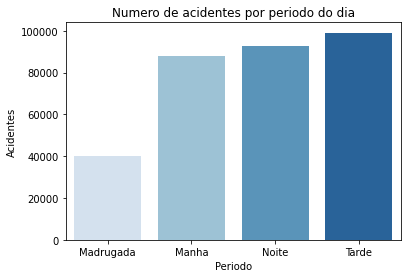

In [20]:
#sns.set_context(context=None)

sns.barplot(x=periodo_labels[::-1], y=periodo_values[::-1], palette='Blues')
plt.title('Numero de acidentes por periodo do dia')
plt.xlabel('Periodo')
plt.ylabel('Acidentes');

In [21]:
anos_count = ocorrencias['ano'].value_counts()
anos_y = anos_count.values

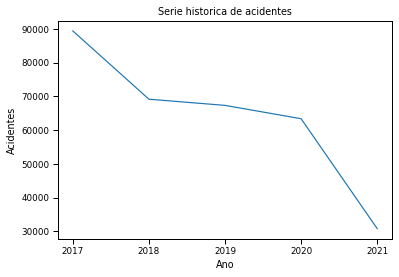

In [23]:
#todo markers

sns.set_context('paper')
sns.lineplot(x=['2017', '2018', '2019', '2020', '2021'], y=anos_y)
plt.title('Serie historica de acidentes')
plt.xlabel('Ano')
plt.ylabel('Acidentes');

In [24]:
dia_semana_count = ocorrencias['dia_semana'].value_counts()
dia_semana_x = ['segunda-feira', 'terça-feira', 'quarta-feira', 
                'quinta-feira', 'sexta-feira','sábado', 'domingo']

count_semanal = {}

for dia in dia_semana_x:
    count_semanal[dia] = dia_semana_count[dia]

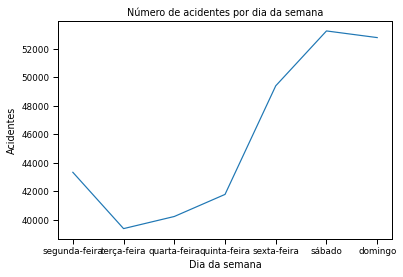

In [25]:
#todo fix x labels

sns.lineplot(x=list(count_semanal.keys()), y=list(count_semanal.values()), palette='Blues')
plt.title('Número de acidentes por dia da semana')
plt.xlabel('Dia da semana')
plt.ylabel('Acidentes');


In [26]:
uf_count = ocorrencias['uf'].value_counts()
uf_labels = uf_count.keys()
uf_value = uf_count.values

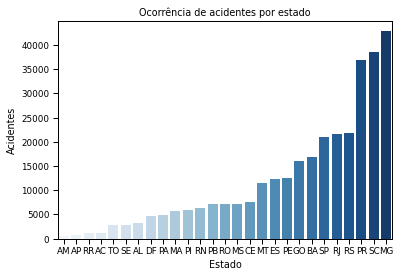

In [27]:
sns.barplot(x=uf_labels[::-1], y=uf_value[::-1], palette='Blues')
plt.title('Ocorrência de acidentes por estado')
plt.xlabel('Estado')
plt.ylabel('Acidentes');

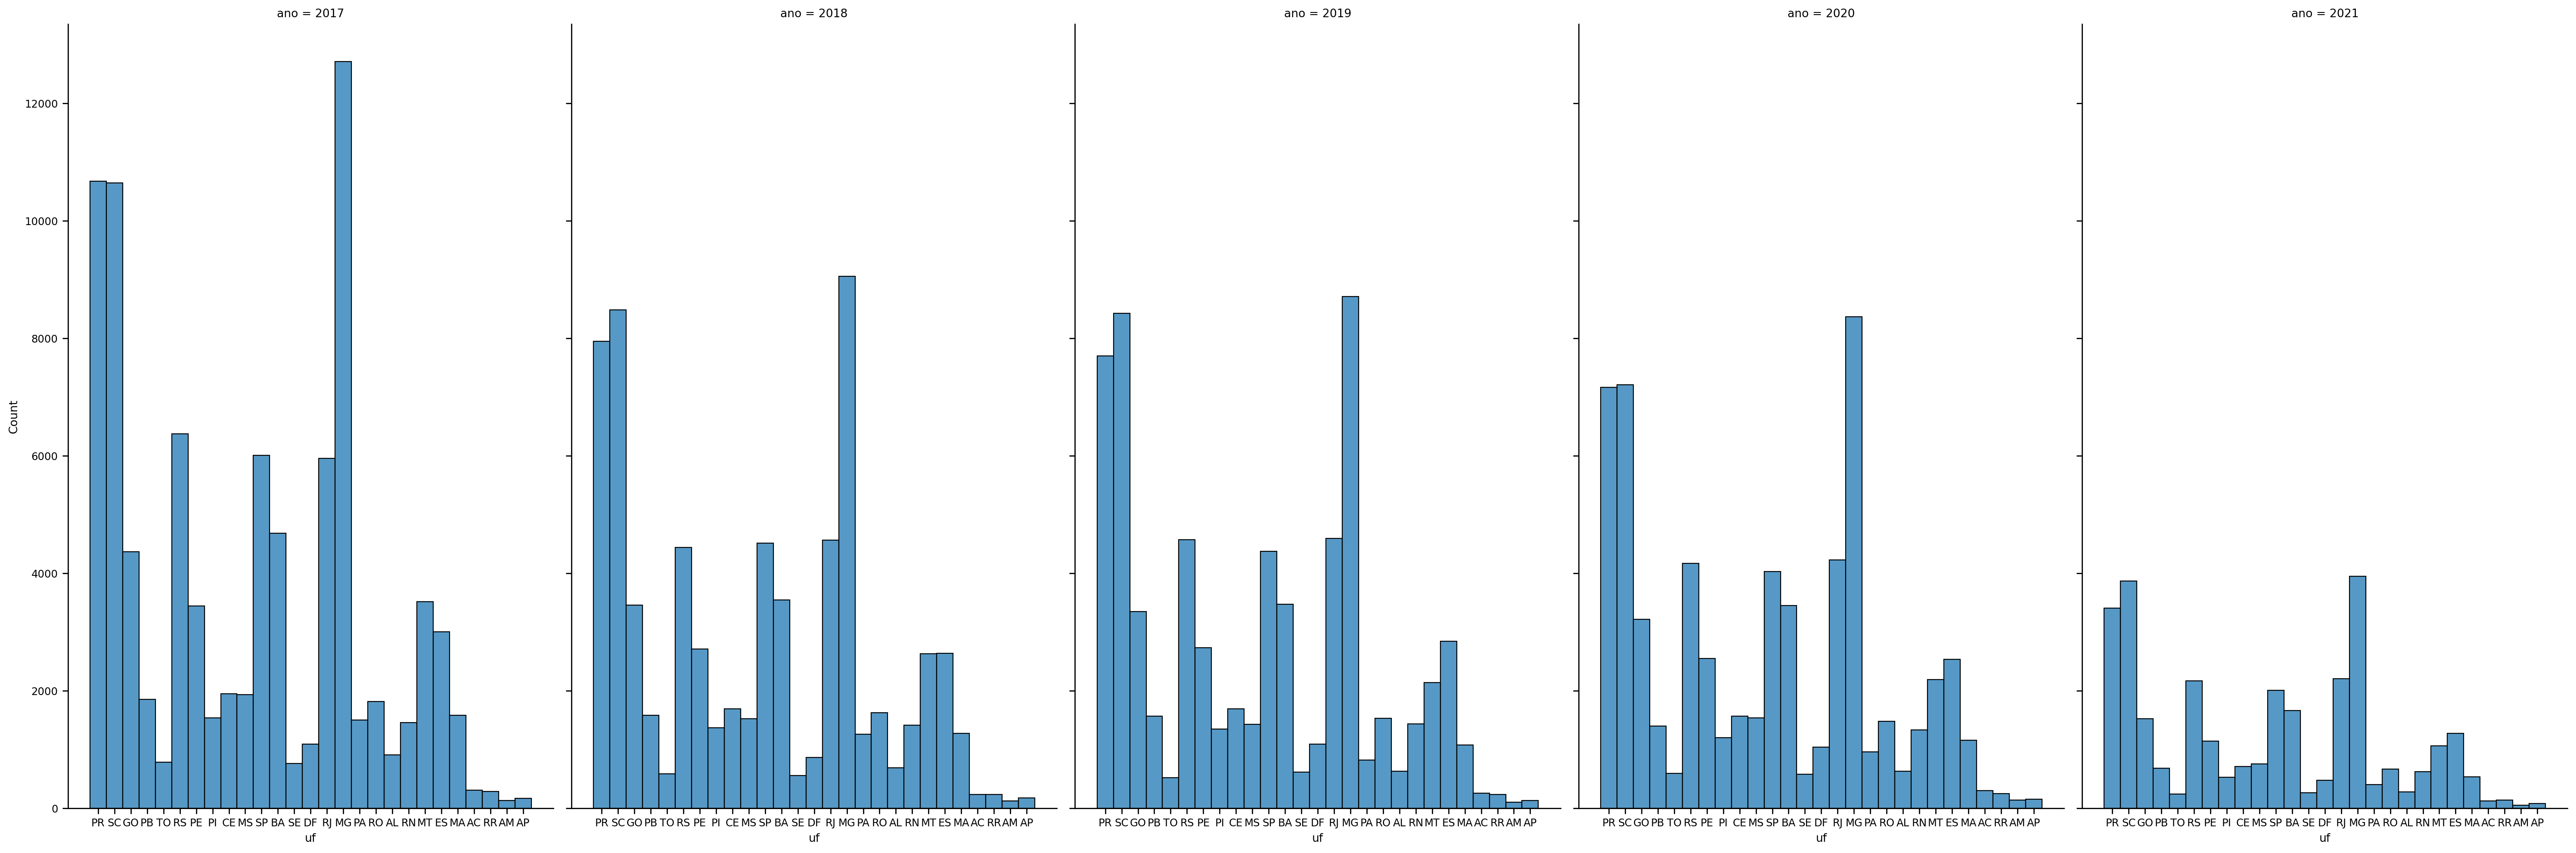

In [150]:
g = sns.FacetGrid(ocorrencias, col="ano", height=10, aspect=0.6)
g.map(sns.histplot, "uf");

In [50]:
ocorrencias_2018['uf'].value_counts()

MG    9055
SC    8486
PR    7946
RJ    4563
SP    4512
RS    4437
BA    3546
GO    3459
PE    2708
ES    2640
MT    2627
CE    1694
RO    1625
PB    1585
MS    1523
RN    1414
PI    1370
MA    1271
PA    1257
DF     865
AL     689
TO     588
SE     558
AC     235
RR     232
AP     173
AM     123
Name: uf, dtype: int64

In [56]:
ocorrencias.groupby(['uf', 'ano']).size()

uf  ano 
AC  2017    304
    2018    235
    2019    252
    2020    296
    2021    120
           ... 
TO  2017    781
    2018    588
    2019    518
    2020    590
    2021    244
Length: 135, dtype: int64

In [42]:
sns.lineplot(data=uf_por_ano)

AttributeError: 'MultiIndex' object has no attribute '_data'

In [ ]:
ocorrencias['uf'].value_counts(normalize=True)

MG    0.133666
SC    0.120682
PR    0.115228
RS    0.067833
RJ    0.067289
SP    0.065365
BA    0.052496
GO    0.049713
PE    0.039275
ES    0.038394
MT    0.036017
CE    0.023792
MS    0.022398
RO    0.022224
PB    0.022095
RN    0.019559
PI    0.018688
MA    0.017526
PA    0.015421
DF    0.014224
AL    0.009773
SE    0.008649
TO    0.008499
AC    0.003770
RR    0.003542
AP    0.002190
AM    0.001693
Name: uf, dtype: float64

In [61]:
ocorrencias.groupby(['uf', 'classificacao_acidente']).size()

uf  classificacao_acidente
AC  Com Vítimas Fatais           79
    Com Vítimas Feridas         919
    Sem Vítimas                 209
AL  Com Vítimas Fatais          354
    Com Vítimas Feridas        1931
                              ...  
SP  Com Vítimas Feridas       14587
    Sem Vítimas                5415
TO  Com Vítimas Fatais          319
    Com Vítimas Feridas        1740
    Sem Vítimas                 662
Length: 81, dtype: int64

In [35]:
ocorrencias.columns

Index(['id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km',
       'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'regional',
       'delegacia', 'uop', 'data', 'feriado', 'ano', 'fim_de_semana',
       'periodo'],
      dtype='object')

In [64]:
ocorrencias.describe()9

,id,br,km,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,feriado,ano,fim_de_semana
count,320156.000000,320156.000000,320156.000000,320156.000000,320156.000000,320156.000000,320156.000000,320156.000000,320156.000000,320156.000000,320156.000000,320156.000000,320156.000000,320156.000000
mean,184250.487009,214.173275,262.158271,2.338526,0.076838,0.827465,0.250659,1.047889,0.135674,1.078124,1.640953,0.038256,2018.615840,0.331254
std,106455.056873,130.924939,228.200682,1.836534,0.329445,1.072691,0.595225,1.421215,0.412475,1.202744,0.734950,0.191815,1.329926,0.470665
min,8.000000,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2017.000000,0.000000
25%,90834.750000,101.000000,77.400000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2017.000000,0.000000
50%,185488.500000,163.000000,197.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,2019.000000,0.000000
75%,276537.250000,343.000000,412.800000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,2020.000000,1.000000
max,374253.000000,498.000000,1454.500000,80.000000,21.000000,58.000000,28.000000,73.000000,16.000000,66.000000,23.000000,1.000000,2021.000000,1.000000


In [100]:
ocorrencias[['pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos', 'ignorados', 'feridos', 'veiculos', 'feriado']].corr()
#Feridos X feridos leves
#Número de pessoas X feridos

,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,feriado
pessoas,1.000000,0.190796,0.514473,0.266458,0.702846,0.155912,0.590710,0.460585,0.013431
mortos,0.190796,1.000000,-0.034008,0.105969,-0.027972,0.082712,0.022112,0.049905,0.003504
feridos_leves,0.514473,-0.034008,1.000000,-0.045706,-0.044141,-0.064732,0.869250,0.081818,0.011282
feridos_graves,0.266458,0.105969,-0.045706,1.000000,-0.073847,0.032011,0.454125,0.071961,0.005579
ilesos,0.702846,-0.027972,-0.044141,-0.073847,1.000000,-0.072475,-0.075914,0.461937,0.005150
ignorados,0.155912,0.082712,-0.064732,0.032011,-0.072475,1.000000,-0.041891,0.102622,0.001866
feridos,0.590710,0.022112,0.869250,0.454125,-0.075914,-0.041891,1.000000,0.108584,0.012823
veiculos,0.460585,0.049905,0.081818,0.071961,0.461937,0.102622,0.108584,1.000000,-0.011020
feriado,0.013431,0.003504,0.011282,0.005579,0.005150,0.001866,0.012823,-0.011020,1.000000


<AxesSubplot:>

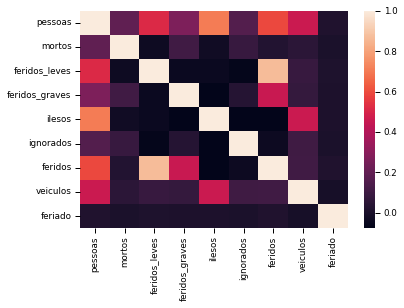

In [113]:
sns.heatmap(ocorrencias[['pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos', 'ignorados', 'feridos', 'veiculos', 'feriado']].corr())

Text(0, 0.5, 'Vitímas')

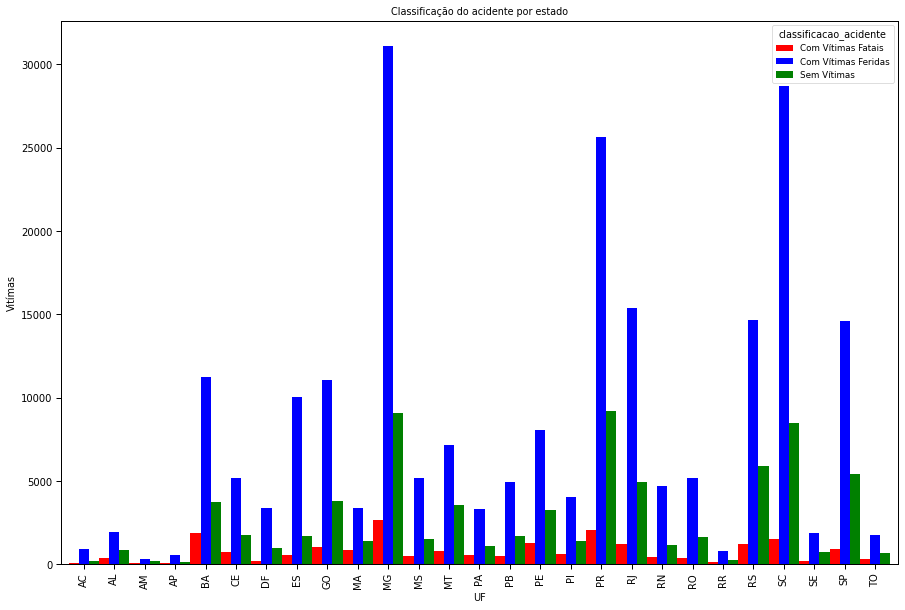

In [86]:
table = pd.crosstab(ocorrencias['uf'],ocorrencias['classificacao_acidente'])
table.plot(kind='bar',width=1.0, color=['red','blue','green'], title='Classificação do acidente por estado', figsize=(15,10), fontsize=10)
plt.xlabel('UF')
plt.ylabel('Vitímas')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e9ea36e3-3ab7-4acd-bb35-f48160e9e4bc' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>